In [2]:
number_of_networks = 10
node_size_list = [100, 1000, 5000, 10000]
ms = [2, 4]
bs = [1, 0, -1, -5, -10, -20, -50, -100]

In [9]:
from pprint import pprint
from unittest import result

import networkx as nx
import graph_tool as gt
import pandas as pd

from lib.utilities import graph_from_netfile
from lib.utilities import graph_from_netfile_gt

import matplotlib.pyplot as plt

result_dir = "./data/result/"

number_of_networks = 10
node_size_list = [100, 1000, 5000, 10000]
m = 4
bs = [1, 0, -1, -5, -10, -20, -50, -100]

_config = False
if _config:
    config_str = ""
else:
    config_str = "_no_config"

for b in bs:
    for node_size in node_size_list:
        print(f"b={b}\tn={node_size}")
        total_sp_length = 0
        sp_dict = {}
        for i in range(number_of_networks):
            net_file_path = f"./data/network/net_n{node_size}_m{m}_b{b}{config_str}/link{i}.net"
            G = graph_from_netfile_gt(net_file_path)
            ave_shortest_path_length = 0
            for s in G.get_vertices():
                ave_shortest_path_length += sum(gt.topology.shortest_distance(G, source=G.vertex(1)).a) / (node_size * (node_size - 1))
            sp_dict[f"net{i+1}"] = ave_shortest_path_length
        t = [length for length in sp_dict.values()]
        sp_dict["all"] = [sum(t) / len(t)]
        sp_df = pd.DataFrame.from_dict(sp_dict)
        sp_df.to_csv(result_dir + f"sp_n{node_size}_m{m}_b{b}{config_str}.csv")
    print(G)

b=1	n=100


AttributeError: module 'graph_tool' has no attribute 'label_largest_component'

In [2]:
# ネットワークのノード数
import graph_tool as gt
from lib.utilities import graph_from_netfile_gt
node_size_list = [100, 1000, 5000, 10000]
for node_size in node_size_list:
    net_file_path = f"./data/network/net_n{node_size}_m2_b1/link0.net"
    G = graph_from_netfile_gt(net_file_path)
    print(G)

<Graph object, undirected, with 100 vertices and 196 edges, 1 internal edge property, at 0x10508b8b0>
<Graph object, undirected, with 1000 vertices and 1996 edges, 1 internal edge property, at 0x164b161a0>
<Graph object, undirected, with 5000 vertices and 9996 edges, 1 internal edge property, at 0x105037580>
<Graph object, undirected, with 10000 vertices and 19996 edges, 1 internal edge property, at 0x164a439a0>


In [3]:
from pprint import pprint
from unittest import result

import networkx as nx
import graph_tool as gt
import pandas as pd
from tqdm import tqdm

from lib.utilities import graph_from_netfile
from lib.utilities import graph_from_netfile_gt

import matplotlib.pyplot as plt

result_dir = "./data/ER/res/"

number_of_networks = 100
node_size_list = [100, 1000, 5000, 10000]

for node_size in node_size_list:
    print(f"n={node_size}")
    p = 3.9 / node_size
    total_sp_length = 0
    sp_dict = {}
    for i in tqdm(range(number_of_networks)):
        net_file_path = f"./data/ER/net/n{node_size}/g_{p}_{i}.net"
        G = graph_from_netfile_gt(net_file_path)
        G = gt.topology.extract_largest_component(G)
        ave_shortest_path_length = 0
        for s in G.get_vertices():
            ave_shortest_path_length += sum(gt.topology.shortest_distance(G, source=G.vertex(1)).a) / (node_size * (node_size - 1))
        sp_dict[f"net{i+1}"] = ave_shortest_path_length
    t = [length for length in sp_dict.values()]
    sp_dict["all"] = [sum(t) / len(t)]
    sp_df = pd.DataFrame.from_dict(sp_dict)
    sp_df.to_csv(result_dir + f"sp_ER_n{node_size}.csv")

n=100


100%|██████████| 100/100 [00:01<00:00, 57.82it/s]


n=1000


 27%|██▋       | 27/100 [00:09<00:25,  2.86it/s]


ValueError: Invalid vertex index: 1

config is False


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


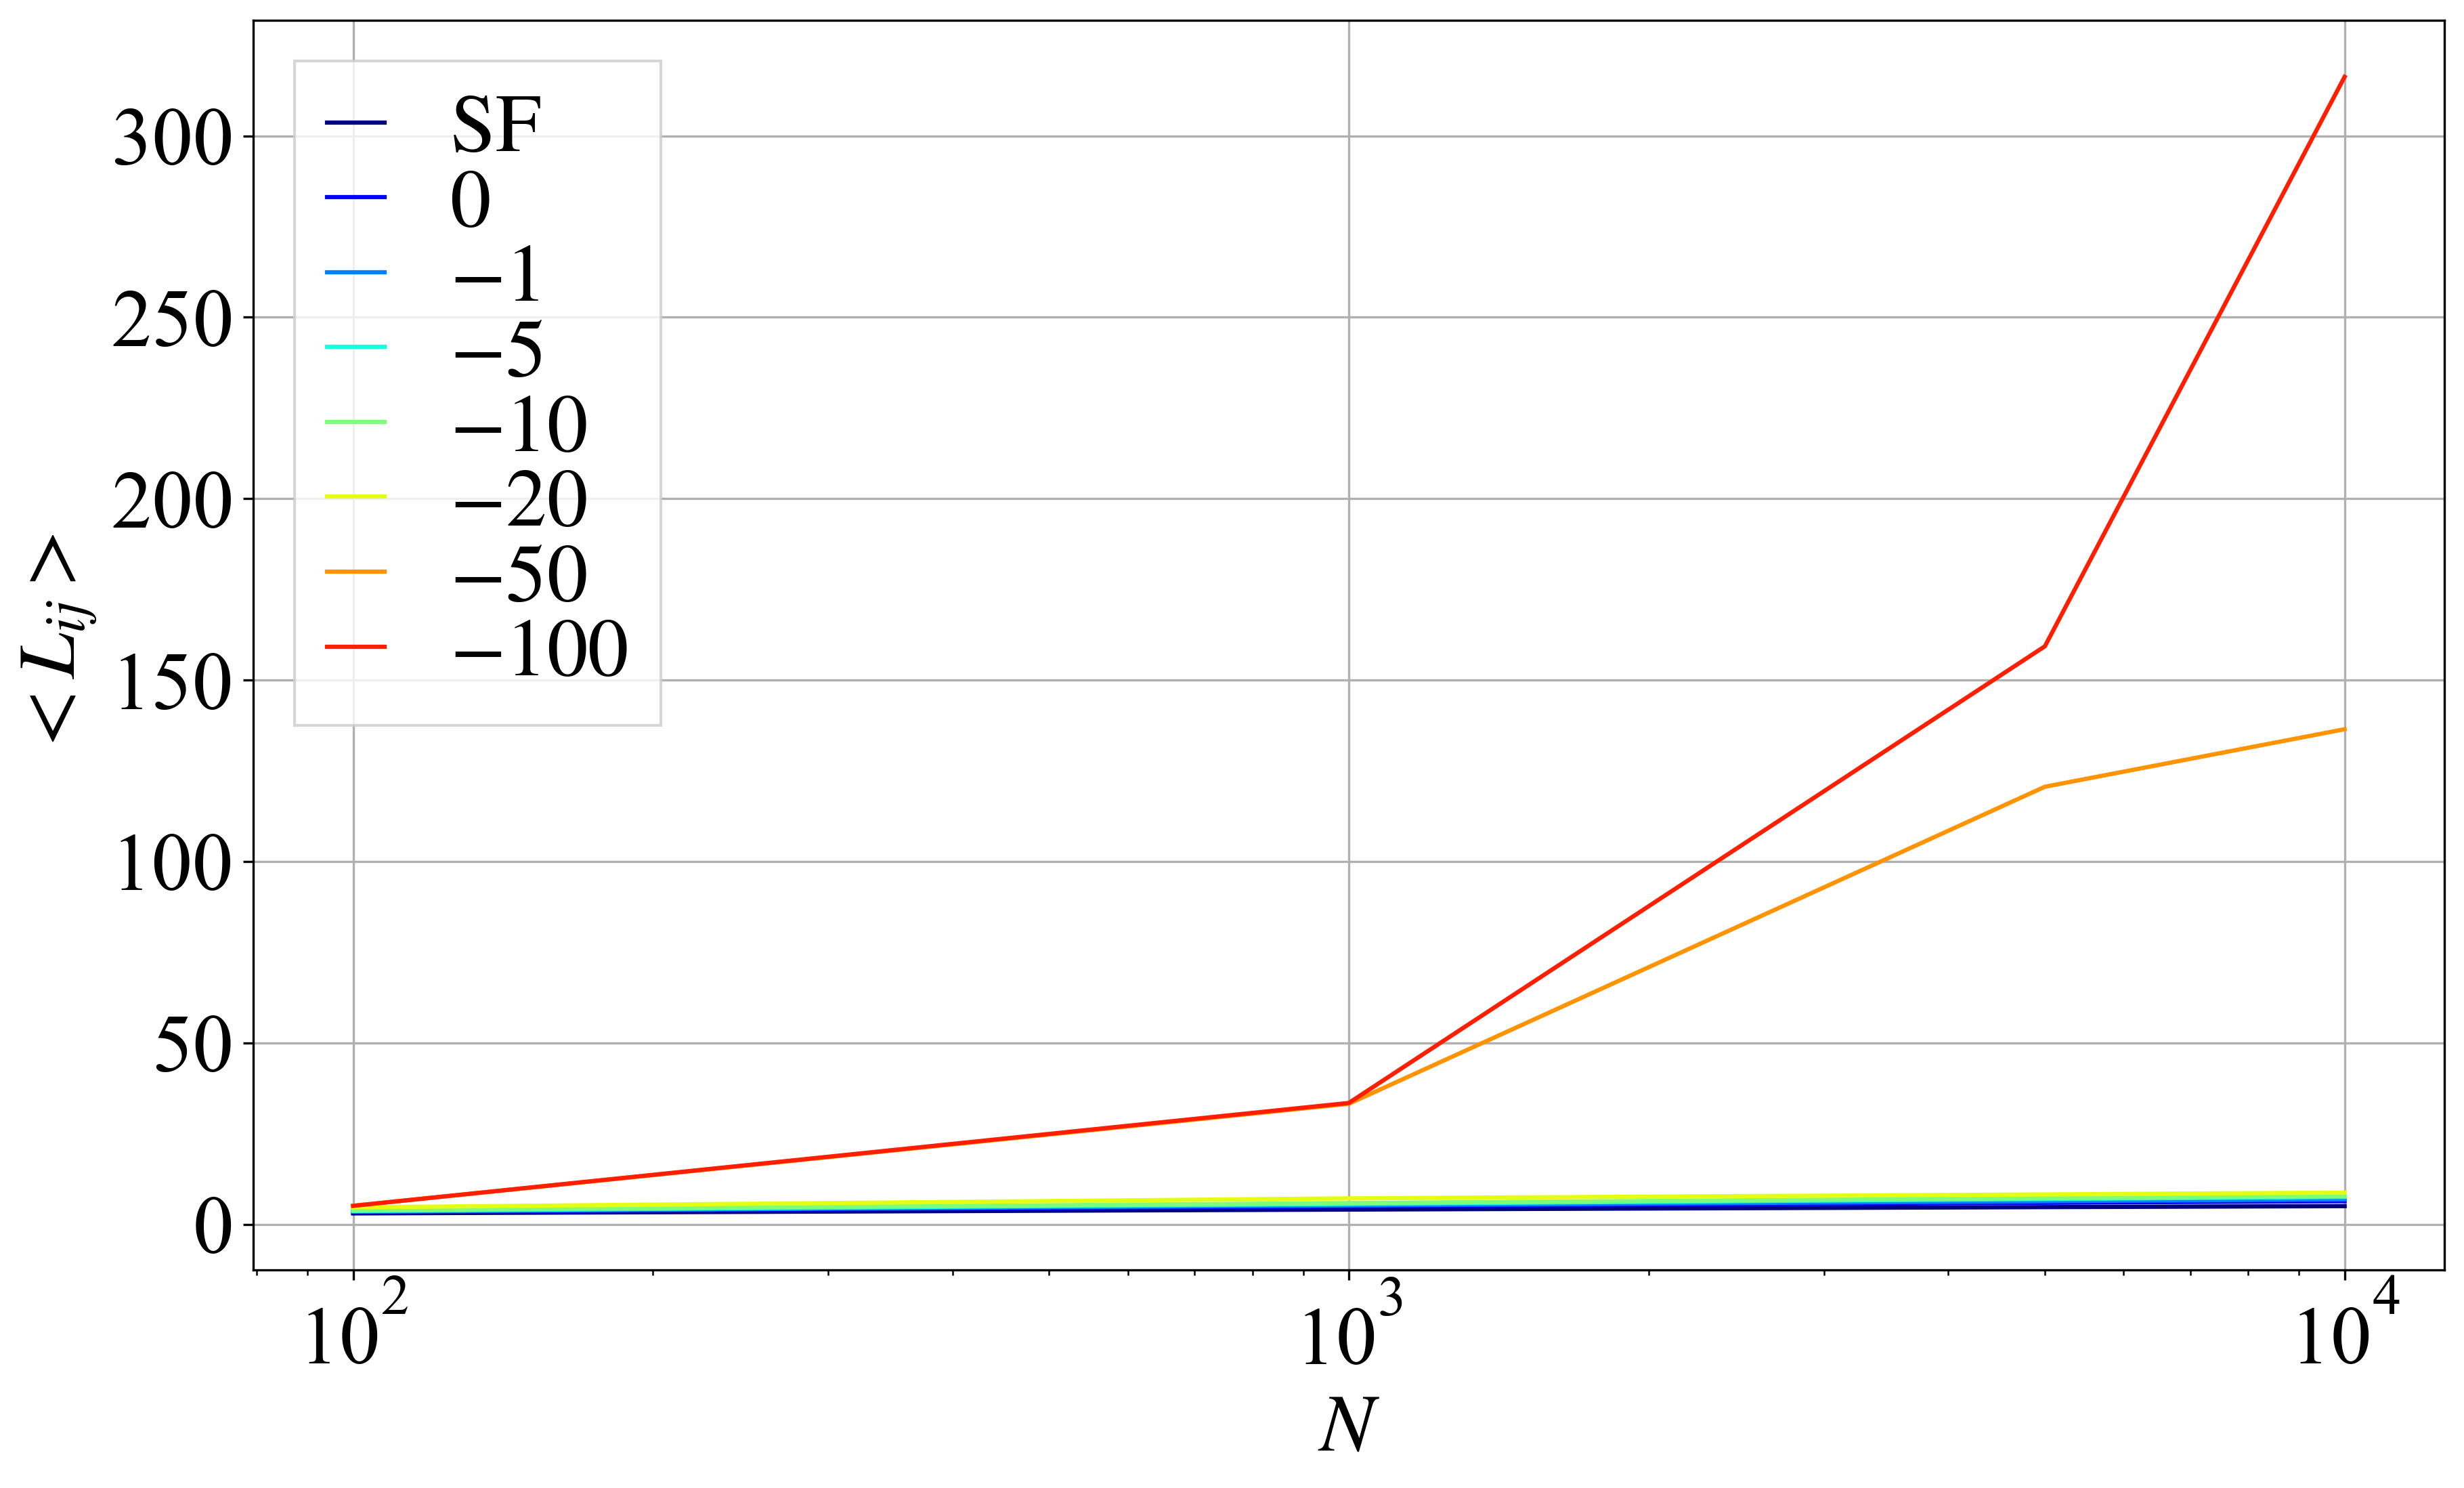

In [4]:
from colorsys import hsv_to_rgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# グラフの設定
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "stix"

plt.rcParams["font.size"] = 29
plt.rcParams["axes.grid"] = True
plt.rcParams["legend.fancybox"] = False
plt.rcParams["legend.handlelength"] = 0.7
plt.rcParams["legend.labelspacing"] = 0
plt.rcParams["legend.handletextpad"] = 0.8  # 凡例の線と文字の距離の長さ
plt.rcParams["legend.markerscale"] = 1  # 点がある場合のmarker scale
plt.rcParams["legend.fontsize"] = 29
# plt.rcParams["ps.useafm"] = True
# plt.rcParams["pdf.use14corefonts"] = True
# plt.rcParams["text.usetex"] = True
plt.rcParams['figure.dpi'] = 300

fig, ax = plt.subplots(tight_layout=True, figsize=(8*1.6, 5*1.6))
fig.subplots_adjust(bottom=0.2, left=0.18, top=0.99, right=0.96)

num_of_network = 100
ns = [100, 1000, 5000, 10000]
m = 2
bs = [1, 0, -1, -5, -10, -20, -50, -100]

_config = False
if _config:
    config_str = ""
else:
    config_str = "_no_config"

print(f"config is {_config}")

c1_h = 358 / 360
c2_h = 224 / 360
g = (c1_h - c2_h) / len(bs)

colors = [hsv_to_rgb(c1_h - i * g, 0.9, 1.0) for i in range(len(bs))]

# xy = {}
# for n in ns:
#     df = pd.read_csv(f"./data/ER/res/sp_ER_n{n}.csv")
#     shortest_length = float(df["all"])
#     xy[n] = shortest_length
#     # print(xy)

# label_ = "ER"
# plt.plot(xy.keys(), xy.values(), label=label_, linestyle="dashed", color=cm.jet(1))

for color, b in enumerate(bs):
    xy = {}
    for n in ns:
        df = pd.read_csv(f"./data/result/sp_n{n}_m{m}_b{b}_{num_of_network}mean{config_str}.csv")
        shortest_length = float(df["all"])
        xy[n] = shortest_length
    # print(xy)

    label_ = fr"${b}$" if b != 1 else r"$\rm{SF}$"
    plt.plot(xy.keys(), xy.values(), label=label_, color=cm.jet(color / len(bs)))

# ax.set_ylim(0, 20)
ax.set_xscale("log")
ax.set_xlabel("$N$")
ax.set_ylabel("$<L_{ij}>$")
plt.legend()
fig.savefig(f'./img/sp{config_str}_m{m}.eps', bbox_inches="tight", pad_inches=0.05)
plt.show()

/var/folders/rl/z9ft4kc56y51v95m5wqlr1nh0000gn/T/ipykernel_2937/259349921.py:91: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  shortest_length = float(df["all"])
/var/folders/rl/z9ft4kc56y51v95m5wqlr1nh0000gn/T/ipykernel_2937/259349921.py:91: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  shortest_length = float(df["all"])
/var/folders/rl/z9ft4kc56y51v95m5wqlr1nh0000gn/T/ipykernel_2937/259349921.py:91: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  shortest_length = float(df["all"])
/var/folders/rl/z9ft4kc56y51v95m5wqlr1nh0000gn/T/ipykernel_2937/259349921.py:91: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) i

1 {100: 3.010709090909091, 1000: 4.080047287287284, 5000: 4.754287611922383, 10000: 5.032890520452049}
0 {100: 3.387822222222221, 1000: 4.933807727727729, 5000: 5.961661475495099, 10000: 6.393654003200326}
-1 {100: 3.491062626262627, 1000: 5.201507527527528, 5000: 6.403834584516902, 10000: 6.919626792679269}
-5 {100: 3.5816323232323226, 1000: 5.498028848848849, 5000: 6.865625897179435, 10000: 7.457009633563355}
-10 {100: 3.592379797979796, 1000: 5.577881321321325, 5000: 6.994667739947992, 10000: 7.607033656765682}
-20 {100: 3.6089717171717166, 1000: 5.625887107107108, 5000: 7.069806382076419, 10000: 7.694488284228422}
-50 {100: 3.6104686868686855, 1000: 5.643373073073075, 5000: 7.099119489497905, 10000: 7.7287039257925745}
-100 {100: 3.612103030303032, 1000: 5.644031491491494, 5000: 7.099163023804766, 10000: 7.728935993999404}
1 {100: 3.0260484848484834, 1000: 4.080984484484484, 5000: 4.756058651730346, 10000: 5.027047095909594}
0 {100: 3.386107070707071, 1000: 4.93236738738739, 5000: 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


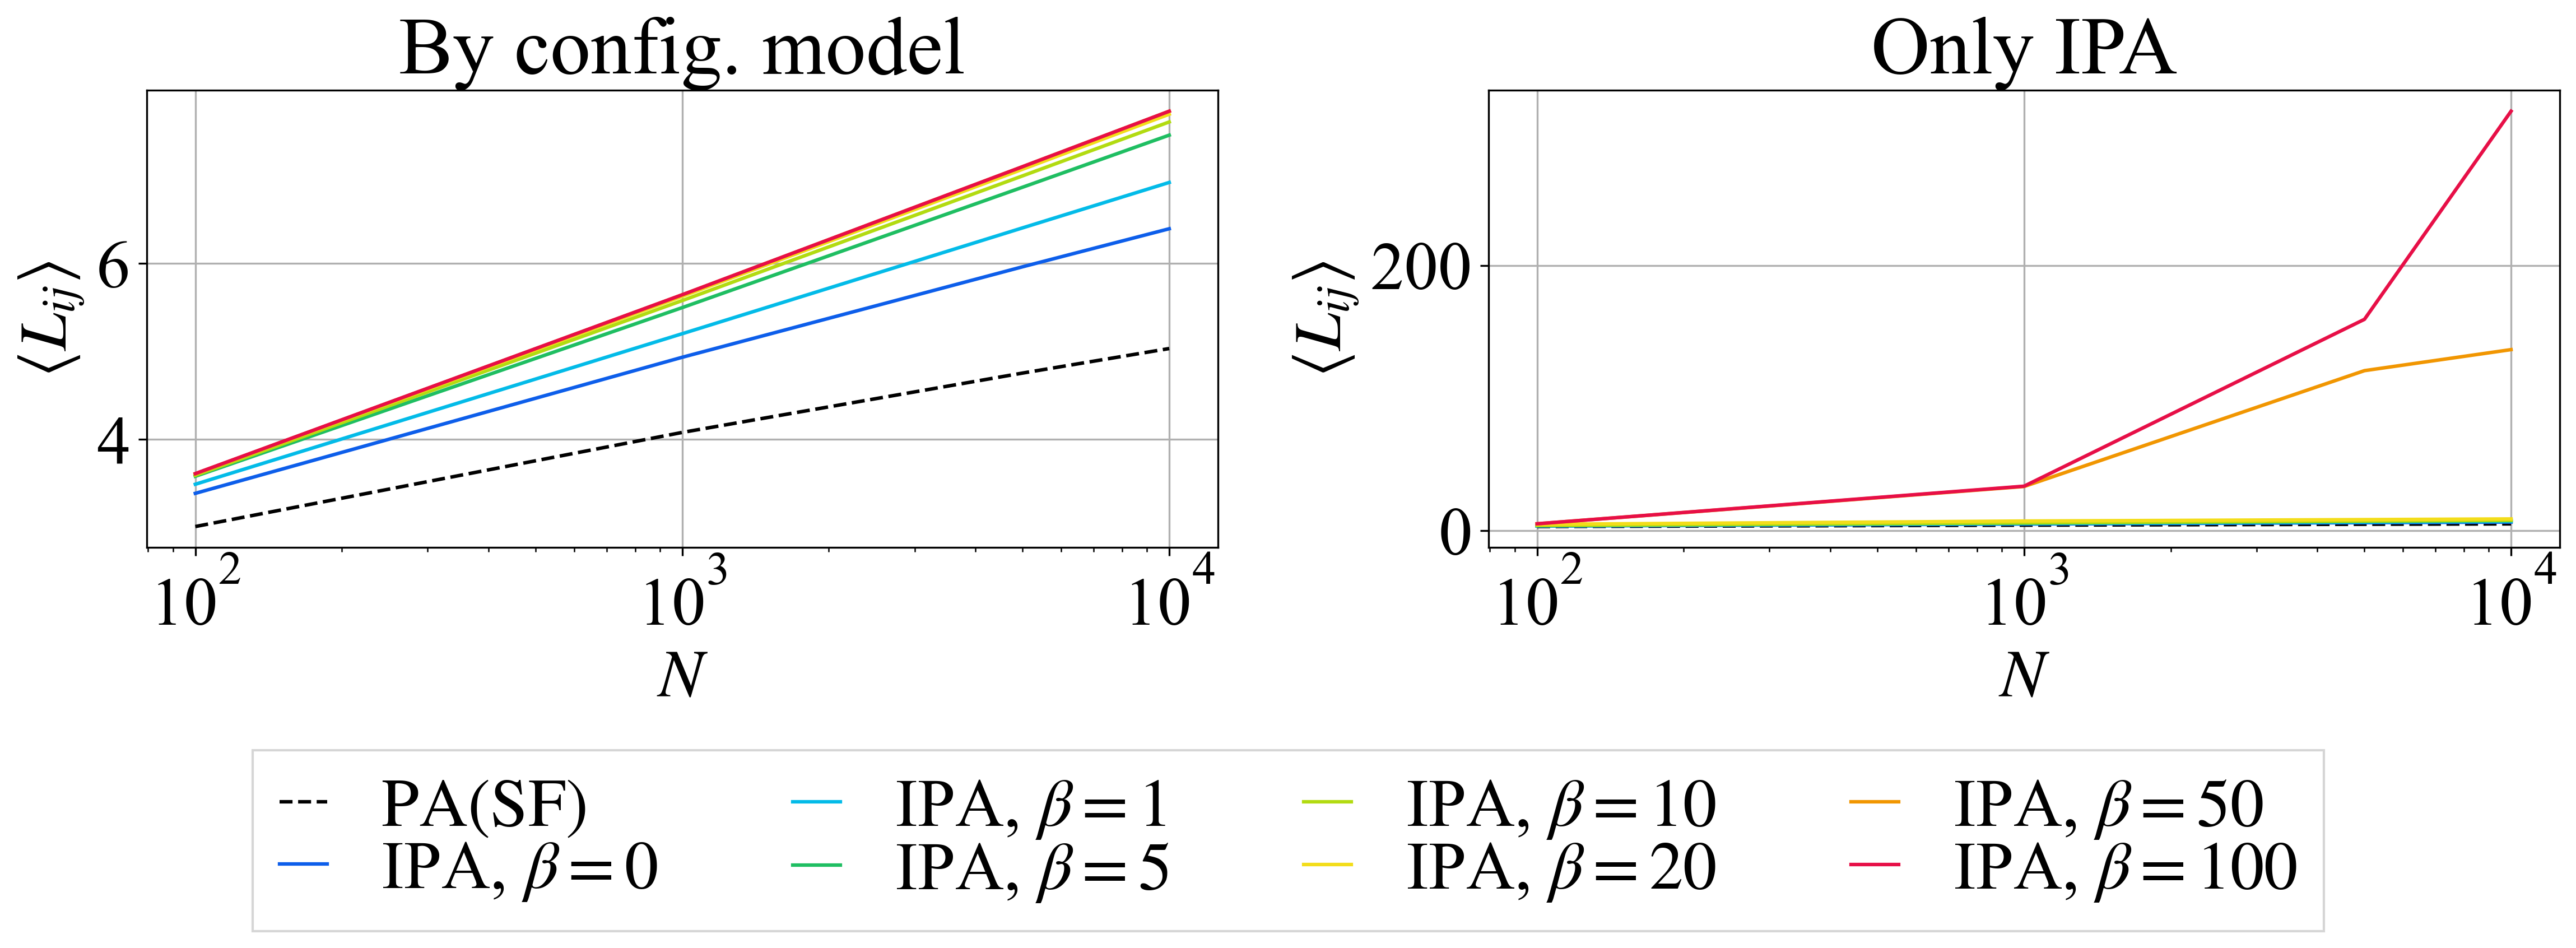

In [1]:
import itertools
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
from tqdm import tqdm
from colorsys import hsv_to_rgb

from lib.utilities import frequency_distribution

ns = [100, 1000, 5000, 10000]
nn = 100
m = 2
bs = [1, 0, -1, -5, -10, -20, -50, -100]
config = True

config_str = "" if config else "_no_config"

c1_h = 358 / 360
c2_h = 224 / 360
g = (c1_h - c2_h) / len(bs)

colors = [
    "",
    "#0d5eea",
    "#03BBE8",
    "#1FBE62",
    "#b2db11",
    "#f3dd1a",
    "#f19601",
    "#e70f47",
]
lss = ["-", "--", "-."]

# グラフの設定
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "stix"

plt.rcParams["font.size"] = 29
plt.rcParams["axes.grid"] = True
plt.rcParams["legend.fancybox"] = False
plt.rcParams["legend.handlelength"] = 0.7
plt.rcParams["legend.labelspacing"] = 0
plt.rcParams["legend.handletextpad"] = 0.8  # 凡例の線と文字の距離の長さ
plt.rcParams["legend.markerscale"] = 1  # 点がある場合のmarker scale
plt.rcParams["legend.fontsize"] = 29
# plt.rcParams["ps.useafm"] = True
# plt.rcParams["pdf.use14corefonts"] = True
# plt.rcParams["text.usetex"] = True
plt.rcParams['figure.dpi'] = 300

ys = 1
xs = 2
fig, ax = plt.subplots(ys, xs, tight_layout=True, figsize=(8*xs, 5*ys))

fig.subplots_adjust(bottom=0.2, left=0.18, top=0.99, right=0.96)

# ax[0][0].set_title("Config")
# ax[0][1].set_title("No Config")

# ax[0][0].set_ylabel("$m = 2$""\n""$L_{ij}$")
# ax[1][0].set_ylabel("$m = 4$""\n""$L_{ij}$")

# ax[1][0].set_xlabel("$N$")
# ax[1][1].set_xlabel("$N$")

ax[0].set_title("By config. model")
ax[1].set_title("Only IPA")
ax[0].set_ylabel(r"$\langle L_{ij} \rangle$")
ax[1].set_ylabel(r"$\langle L_{ij} \rangle$")
ax[0].set_xlabel("$N$")
ax[1].set_xlabel("$N$")

# xy = {}
# for n in ns:
#     df = pd.read_csv(f"./data/ER/res/sp_ER_n{n}.csv")
#     shortest_length = float(df["all"])
#     xy[n] = shortest_length
#     if n == 10000:
#         print(xy)
#     # print(xy)

# label_ = "ER"
# ax[0].plot(xy.keys(), xy.values(), label=label_, linestyle="dashdot", color=cm.jet(1))
# ax[1].plot(xy.keys(), xy.values(), label=label_, linestyle="dashdot", color=cm.jet(1))

for clr_i, b in enumerate(bs):
    xy = {}
    for n in ns:
        df = pd.read_csv(f"./data/result/sp_n{n}_m2_b{b}_{nn}mean.csv")
        shortest_length = float(df["all"])
        xy[n] = shortest_length
        if n == 10000:
            print(b, xy)

    if b == 1:
        label_ = r"$\rm{PA(SF)}$"
        ax[0].plot(xy.keys(), xy.values(), label=label_, linestyle="dashed", color="black")
    elif b == 0:
        label_ = r"IPA, $\beta=0$"
        ax[0].plot(xy.keys(), xy.values(), label=label_, color=colors[clr_i])
    else:
        label_ = fr"IPA, $\beta={b*-1}$"
        ax[0].plot(xy.keys(), xy.values(), label=label_, color=colors[clr_i])

for clr_i, b in enumerate(bs):
    xy = {}
    for n in ns:
        df = pd.read_csv(f"./data/result/sp_n{n}_m2_b{b}_{nn}mean_no_config.csv")
        shortest_length = float(df["all"])
        xy[n] = shortest_length
        if n == 10000:
            print(b, xy)

    if b == 1:
        label_ = r"$\rm{PA(SF)}$"
        ax[1].plot(xy.keys(), xy.values(), label=label_, linestyle="dashed", color="black")
    elif b == 0:
        label_ = r"IPA, $\beta=0$"
        ax[1].plot(xy.keys(), xy.values(), label=label_, color=colors[clr_i])
    else:
        label_ = fr"IPA, $\beta={b*-1}$"
        ax[1].plot(xy.keys(), xy.values(), label=label_, color=colors[clr_i])

# for clr_i, b in enumerate(bs):
#     xy = {}
#     for n in ns:
#         df = pd.read_csv(f"./data/result/sp_n{n}_m4_b{b}_{nn}mean.csv")
#         shortest_length = float(df["all"])
#         xy[n] = shortest_length

#     label_ = fr"${b}$" if b != 1 else r"$\rm{SF}$"
#     ax[1][0].plot(xy.keys(), xy.values(), label=label_, color=cm.jet(clr_i / len(bs)))

# for clr_i, b in enumerate(bs):
#     xy = {}
#     for n in ns:
#         df = pd.read_csv(f"./data/result/sp_n{n}_m4_b{b}_{nn}mean_no_config.csv")
#         shortest_length = float(df["all"])
#         xy[n] = shortest_length

#     label_ = fr"${b}$" if b != 1 else r"$\rm{SF}$"
#     ax[1][1].plot(xy.keys(), xy.values(), label=label_, color=cm.jet(clr_i / len(bs)))

ax[0].set_xscale("log")
ax[1].set_xscale("log")
lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, loc = 'upper center', bbox_to_anchor=(0.5, 0.08), ncol=4)
fig.patch.set_alpha(0)
fig.savefig(f'./img/shortest_path_length.eps', bbox_inches="tight", pad_inches=0.05)
# plt.savefig("./媒介中心性(エッジ)の分布の変化_loglog.png")
plt.show()
